In [564]:
import numpy
import pandas
import matplotlib.pyplot as plt

In [565]:
def concat_dfs(train_df, test_df):
    return pandas.concat([train_df, test_df]).reset_index(drop=True)

def split_dfs(all_dfs):
    train_df = all_dfs.loc[:890]
    test_df = all_dfs.loc[891:].drop('Survived', axis='columns')
    return train_df, test_df

In [566]:
def split_single(df, split_percent=0.8):
    size = df.shape[0]
    split_idx = size * split_percent

    all_targets = df['Survived']
    all_df = df.drop(columns=['Survived'])

    return all_df.loc[:split_idx], all_targets.loc[:split_idx], all_df.loc[split_idx:], all_targets.loc[split_idx:], 

## Load in dataframes and see missing information

In [567]:
train_df = pandas.read_csv("data/train.csv")
test_df = pandas.read_csv("data/test.csv")
all_df = concat_dfs(train_df, test_df)

train_df.name = 'Training Set' 
test_df.name = 'Test Set' 
all_df.name = 'All Data'

In [568]:
all_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [569]:
all_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [570]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [571]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


## A quick analysis

Survived
0    549
1    342
dtype: int64


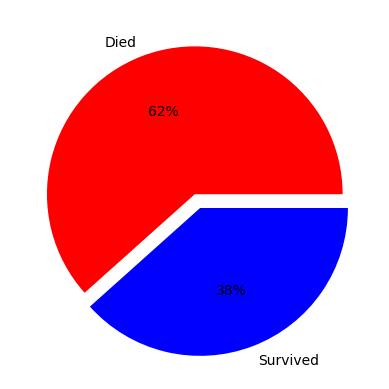

In [572]:
survival_count = train_df.groupby(['Survived']).size()
print(survival_count)

plt.pie(survival_count, labels=['Died', 'Survived'], colors = ['red','blue'], explode=[0,0.1], autopct='%1.0f%%')
plt.show()

## How do sex and class impact survival rate?

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64 

Male Survival rate: 0.18890814558058924
female Survival rate: 0.7420382165605095


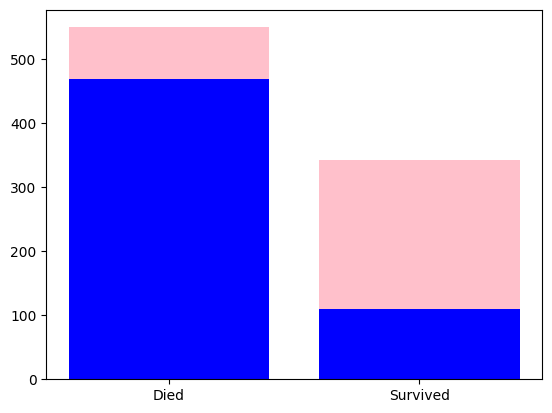

In [573]:
sex_survival_rate = train_df.groupby(['Sex', 'Survived']).size()
sex_count = train_df.groupby(['Sex']).size()
print(sex_survival_rate, "\n")

male_survival_rate = sex_survival_rate['male'][1] / float(sex_count['male'])
female_survival_rate = sex_survival_rate['female'][1] / float(sex_count['female'])

print(f"Male Survival rate: {male_survival_rate}")
print(f"female Survival rate: {female_survival_rate}")

x = ["Died", "Survived"]
y1 = [sex_survival_rate['male'][0], sex_survival_rate['male'][1]]
y2 = [sex_survival_rate['female'][0], sex_survival_rate['female'][1]]

plt.bar(x, y1, color='b', label='male')
plt.bar(x, y2, bottom=y1, color='pink', label='female')
plt.show()

Class 1 survival rate: 0.6296296296296297
Class 2 survival rate: 0.47282608695652173
Class 3 survival rate: 0.24236252545824846



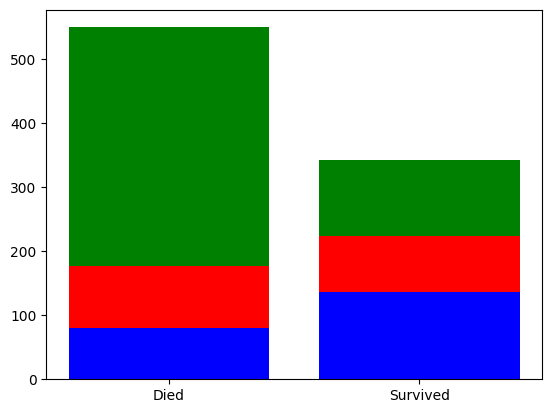

In [574]:
class_survival_rate = train_df.groupby(['Pclass', 'Survived']).size()

for i in range(1,4):
    survival_rate = float(class_survival_rate[i][1]) / (class_survival_rate[i][1] + class_survival_rate[i][0])
    print(f"Class {i} survival rate: {survival_rate}")
print()

x = ['Died', 'Survived']
y1 = numpy.array([class_survival_rate[1][0], class_survival_rate[1][1]])
y2 = numpy.array([class_survival_rate[2][0], class_survival_rate[2][1]])
y3 = numpy.array([class_survival_rate[3][0], class_survival_rate[3][1]])

plt.bar(x, y1, color='b', label='First Class')
plt.bar(x, y2, bottom=y1, color='r', label='Second Class')
plt.bar(x, y3, bottom=y1+y2, color='g', label='Third Class')
plt.show()


## Fill in the missing 'Embarked' values
With some simple research, we observe that they travelled together and boarded from Southampton

In [575]:
all_df[all_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [576]:
all_df['Embarked'] = all_df['Embarked'].fillna('S')

## Engineering a new feature: Family Size

In [577]:
all_df['FamilySize'] = all_df['SibSp'] + all_df['Parch']
all_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


Size: 0  Rate: 0.30353817504655495
Size: 1  Rate: 0.5527950310559007
Size: 2  Rate: 0.5784313725490197
Size: 3  Rate: 0.7241379310344828
Size: 4  Rate: 0.2
Size: 5  Rate: 0.13636363636363635
Size: 6  Rate: 0.3333333333333333
Size: 7  Rate: 0.0
Size: 10  Rate: 0.0


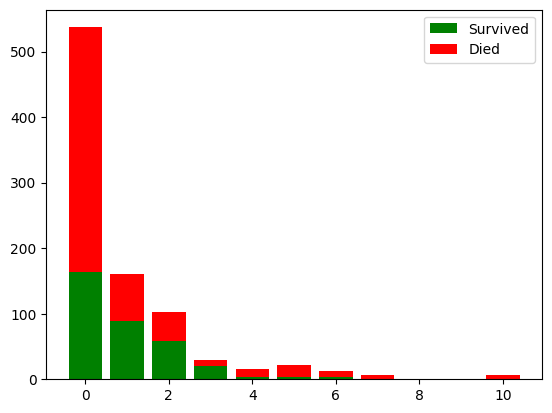

In [578]:
groupby_familySize = all_df.groupby(['FamilySize', 'Survived']).size()

x = sorted(all_df['FamilySize'].unique())

def safeGet(i):
    try:
        return groupby_familySize[i][1]
    except KeyError:
        return 0

y1 = [safeGet(i) for i in x]
y2 = [groupby_familySize[i][0] for i in x]

for i in range(len(x)):
    print(f"Size: {x[i]}  Rate: {y1[i]/(y1[i] + y2[i])}")

plt.bar(x, y1, color='green', label='Survived')
plt.bar(x, y2, bottom=y1, color='red', label='Died')
plt.legend()
plt.show()


## Binning the family sizes

In [579]:
all_df['FamilySize'] = all_df['FamilySize'].apply(lambda x : 'Alone' if x == 0 else 
                                                 'Small' if x >= 1 and x < 4 else 
                                                 'Medium' if x >= 4 and x < 6 else 
                                                 'Large')

In [580]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone


## Note that some people shared a ticket. Gives a better idea of who was travelling together
This should catch children who travelled with nannies

In [581]:
ticket_counts = all_df.groupby(['Ticket']).size()
ticket_counts.sort_values()

Ticket
345769           1
349245           1
349246           1
349247           1
349248           1
                ..
PC 17608         7
S.O.C. 14879     7
CA 2144          8
1601             8
CA. 2343        11
Length: 929, dtype: int64

Bin: 1	Count: 713
Bin: 2	Count: 132
Bin: 3	Count: 49
Bin: 4	Count: 16
Bin: 5	Count: 7
Bin: 6	Count: 4
Bin: 7	Count: 5
Bin: 8	Count: 2
Bin: 9	Count: 0
Bin: 10	Count: 1


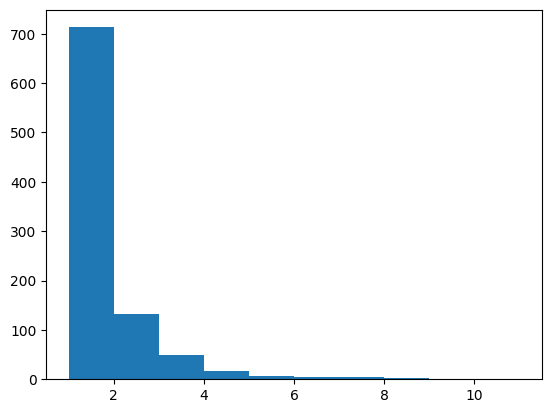

In [582]:
unpack = plt.hist(ticket_counts)
counts = unpack[0]
bins = unpack[1]

for i in range(len(counts)):
    print(f"Bin: {int(bins[i])}\tCount: {int(counts[i])}")

In [583]:
def searchTicketCount(ticket):
    return ticket_counts[ticket]

all_df['Ticket Frequency'] = all_df.apply(lambda x: searchTicketCount(x['Ticket']), axis=1)


In [584]:
all_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Ticket Frequency
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Small,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Small,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Small,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone,1
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Alone,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Alone,2
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Medium,5
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Small,3
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Small,2


## Binning ticket frequency

In [585]:
ticket_counts_survival = all_df.groupby(['Ticket Frequency', 'Survived']).size()
ticket_counts_survival

Ticket Frequency  Survived
1                 0.0         351
                  1.0         130
2                 0.0          88
                  1.0          93
3                 0.0          35
                  1.0          66
4                 0.0          12
                  1.0          32
5                 0.0          14
                  1.0           7
6                 0.0          15
                  1.0           4
7                 0.0          19
                  1.0           5
8                 0.0           8
                  1.0           5
11                0.0           7
dtype: int64

Ticket Frequency: 1  Rate: 0.2702702702702703
Ticket Frequency: 2  Rate: 0.5138121546961326
Ticket Frequency: 3  Rate: 0.6534653465346535
Ticket Frequency: 4  Rate: 0.7272727272727273
Ticket Frequency: 5  Rate: 0.3333333333333333
Ticket Frequency: 6  Rate: 0.21052631578947367
Ticket Frequency: 7  Rate: 0.20833333333333334
Ticket Frequency: 8  Rate: 0.38461538461538464
Ticket Frequency: 11  Rate: 0.0


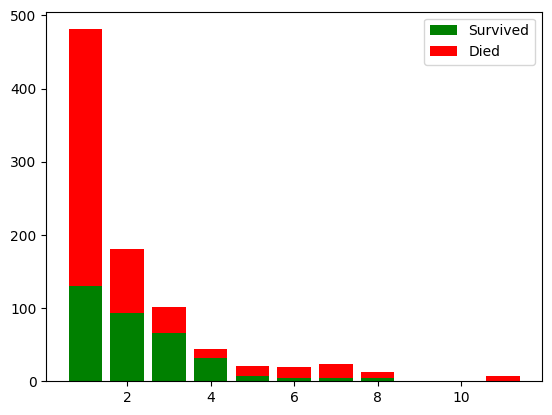

In [586]:
x = sorted(all_df['Ticket Frequency'].unique())

def safeGet(i):
    try:
        return ticket_counts_survival[i][1]
    except KeyError:
        return 0

y1 = [safeGet(i) for i in x]
y2 = [ticket_counts_survival[i][0] for i in x]

for i in range(len(x)):
    print(f"Ticket Frequency: {x[i]}  Rate: {y1[i]/(y1[i] + y2[i])}")

plt.bar(x, y1, color='green', label='Survived')
plt.bar(x, y2, bottom=y1, color='red', label='Died')
plt.legend()
plt.show()

In [587]:
all_df['Ticket Frequency'] = all_df['Ticket Frequency'].apply(lambda x : 'Single' if x == 1 else 
                                                 'Low' if x >= 2 and x < 5 else 
                                                 'Medium' if x >= 4 and x < 9 else 
                                                 ' Large')

In [588]:
all_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Ticket Frequency
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Small,Single
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Small,Low
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone,Single
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Small,Low
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone,Single
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Alone,Single
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Alone,Low
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Medium,Medium
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Small,Low
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Small,Low


## Which decks were the passengers in?

In [589]:
all_df['Deck'] = all_df['Cabin'].apply(lambda s : s[0] if pandas.notnull(s) else 'M')

unique_decks = sorted(all_df['Deck'].unique())
unique_decks

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T']

In [590]:
all_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Ticket Frequency,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Small,Single,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Small,Low,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone,Single,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Small,Low,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone,Single,M
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Alone,Single,M
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Alone,Low,E
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Medium,Medium,M
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Small,Low,M
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Small,Low,M


## How many people were in each cabin?

In [591]:
cabin_count = all_df.groupby(['Cabin']).size()
print(sorted(cabin_count))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 6]


## Considering the fares

In [592]:
all_df['Fare'] = pandas.qcut(all_df['Fare'], 13)
all_df.groupby(['Fare', 'Survived']).size()

Fare               Survived
(-0.001, 7.25]     0.0         72
                   1.0         11
(7.25, 7.75]       0.0         39
                   1.0         18
(7.75, 7.896]      0.0         68
                   1.0         15
(7.896, 8.05]      0.0         48
                   1.0         14
(8.05, 10.5]       0.0         60
                   1.0         18
(10.5, 13.0]       0.0         35
                   1.0         30
(13.0, 15.742]     0.0         33
                   1.0         16
(15.742, 23.25]    0.0         32
                   1.0         36
(23.25, 26.55]     0.0         41
                   1.0         36
(26.55, 34.157]    0.0         40
                   1.0         25
(34.157, 56.496]   0.0         41
                   1.0         34
(56.496, 83.475]   0.0         25
                   1.0         38
(83.475, 512.329]  0.0         15
                   1.0         51
dtype: int64

### Some of the decks have much higher fares. Could this be correlated to class?

In [593]:
deck_counts = all_df.groupby(['Deck']).size()
deck_counts

Deck
A      22
B      65
C      94
D      46
E      41
F      21
G       5
M    1014
T       1
dtype: int64

In [594]:
deck_by_class = all_df.groupby(['Deck', 'Pclass']).size()

In [595]:
deck_by_class

Deck  Pclass
A     1          22
B     1          65
C     1          94
D     1          40
      2           6
E     1          34
      2           4
      3           3
F     2          13
      3           8
G     3           5
M     1          67
      2         254
      3         693
T     1           1
dtype: int64

We can see that A,B,C are all first class cabins. There is one guy in T and he is in first class

Total: 22	 1: 1.0 		 2:0.0 		 3:0.0
Total: 65	 1: 1.0 		 2:0.0 		 3:0.0
Total: 94	 1: 1.0 		 2:0.0 		 3:0.0
Total: 46	 1: 0.8695652173913043 		 2:0.13043478260869565 		 3:0.0
Total: 41	 1: 0.8292682926829268 		 2:0.0975609756097561 		 3:0.07317073170731707
Total: 21	 1: 0.0 		 2:0.6190476190476191 		 3:0.38095238095238093
Total: 5	 1: 0.0 		 2:0.0 		 3:1.0
Total: 1014	 1: 0.06607495069033531 		 2:0.2504930966469428 		 3:0.6834319526627219
Total: 1	 1: 1.0 		 2:0.0 		 3:0.0


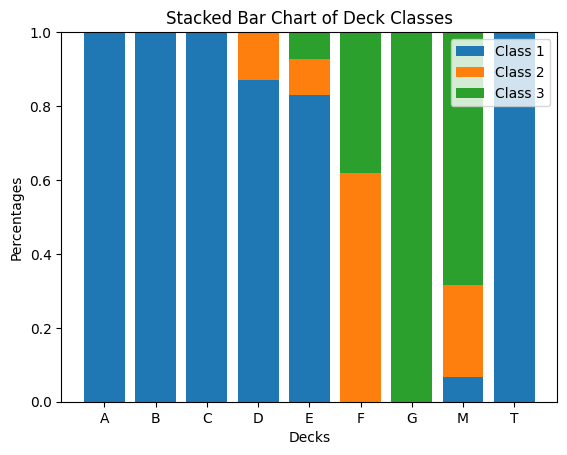

In [596]:
x = unique_decks

WEIGHT = 1

percentClass1 = numpy.array([deck_by_class[deck][1]/deck_counts[deck] * WEIGHT if 1 in deck_by_class[deck] else 0 for deck in unique_decks])
percentClass2 = numpy.array([deck_by_class[deck][2]/deck_counts[deck] * WEIGHT if 2 in deck_by_class[deck] else 0 for deck in unique_decks])
percentClass3 = numpy.array([deck_by_class[deck][3]/deck_counts[deck] * WEIGHT if 3 in deck_by_class[deck] else 0 for deck in unique_decks])

for idx, deck in enumerate(unique_decks):
    print(f"Total: {deck_counts[deck]}\t 1: {percentClass1[idx]} \t\t 2:{percentClass2[idx]} \t\t 3:{percentClass3[idx]}")

# Width of the bars
bar_width = 0.8

# X locations for the groups
x = numpy.arange(len(unique_decks))

# Create the plot
fig, ax = plt.subplots()

# Stacked bar chart
ax.bar(x, percentClass1, bar_width, label='Class 1')
ax.bar(x, percentClass2, bar_width, bottom=percentClass1, label='Class 2')
ax.bar(x, percentClass3, bar_width, bottom=percentClass1 + percentClass2, label='Class 3')

# Add labels, title, and legend
ax.set_xlabel('Decks')
ax.set_ylabel('Percentages')
ax.set_title('Stacked Bar Chart of Deck Classes')
ax.set_xticks(x)
ax.set_xticklabels(unique_decks)
ax.legend()

# Show the plot
plt.show()


## Deck survival rates

In [597]:
train_df, test_df = split_dfs(all_df)

for deck in unique_decks:
    total = len(train_df[train_df['Deck'] == deck])
    survived = len(train_df[(train_df['Deck'] == deck) & (train_df['Survived'] == 1)])
    survival_rate = survived / float(total)
    print(f"Deck: {deck} \t Survival Rate: {survival_rate}")

Deck: A 	 Survival Rate: 0.4666666666666667
Deck: B 	 Survival Rate: 0.7446808510638298
Deck: C 	 Survival Rate: 0.5932203389830508
Deck: D 	 Survival Rate: 0.7575757575757576
Deck: E 	 Survival Rate: 0.75
Deck: F 	 Survival Rate: 0.6153846153846154
Deck: G 	 Survival Rate: 0.5
Deck: M 	 Survival Rate: 0.29985443959243085
Deck: T 	 Survival Rate: 0.0


## Considering classes and deck survival rates, I will group like so:
(A,B,C,T), (D,E), (F,G), M

In [598]:
ABCT = ['A','B','C','T']
DE = ['D','E']
FG = ['F','G']
all_df['Deck'] = all_df['Deck'].apply(lambda x: 
                                      'ABCT' if x in ABCT else 
                                      'DE' if x in DE else 
                                      'FG' if x in FG else x)

## Binary encoding Sex, deck, Family Size

In [599]:
from sklearn.preprocessing import LabelEncoder

sexEncoder = LabelEncoder()
deckEncoder = LabelEncoder()
familySizeEncoder = LabelEncoder()
ticketFreqEncoder = LabelEncoder()
fareEncoder = LabelEncoder()

sexEncoder.fit(all_df['Sex'].unique())
deckEncoder.fit(all_df['Deck'].unique())
familySizeEncoder.fit(all_df['FamilySize'].unique())
ticketFreqEncoder.fit(all_df['Ticket Frequency'].unique())
fareEncoder.fit(all_df['Fare'].unique())

all_df['Sex'] = sexEncoder.transform(all_df['Sex'])
all_df['Deck'] = deckEncoder.transform(all_df['Deck'])
all_df['FamilySize'] = familySizeEncoder.transform(all_df['FamilySize'])
all_df['Ticket Frequency'] = ticketFreqEncoder.transform(all_df['Ticket Frequency'])
all_df['Fare'] = fareEncoder.transform(all_df['Fare'])

In [600]:
all_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Ticket Frequency,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,0,NaN,S,3,3,3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,11,C85,C,3,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,3,NaN,S,0,3,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,10,C123,S,3,1,0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,3,NaN,S,0,3,3
5,6,0.0,3,"Moran, Mr. James",1,NaN,0,0,330877,4,NaN,Q,0,3,3
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,10,E46,S,0,1,1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,7,NaN,S,2,2,3
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,5,NaN,S,3,1,3
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,9,NaN,C,3,1,3


## Parsing the names

In [601]:
all_df['Initial'] = all_df['Name'].apply(lambda s : s[0])

In [602]:
all_df['Family Name'] = all_df['Name'].apply(lambda s : s.split(',')[0].strip())
all_df['Title'] = all_df['Name'].apply(lambda s : s.split(',')[1].split('.')[0].strip())

In [603]:
print(all_df['Title'].unique())
all_df.groupby(['Title','Sex']).size()

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


Title         Sex
Capt          1        1
Col           1        4
Don           1        1
Dona          0        1
Dr            0        1
              1        7
Jonkheer      1        1
Lady          0        1
Major         1        2
Master        1       61
Miss          0      260
Mlle          0        2
Mme           0        1
Mr            1      757
Mrs           0      197
Ms            0        2
Rev           1        8
Sir           1        1
the Countess  0        1
dtype: int64

In [604]:
train_df, test_df = split_dfs(all_df)

survival_by_title = train_df.groupby(['Title','Survived']).size()
survival_by_title

Title         Survived
Capt          0.0           1
Col           0.0           1
              1.0           1
Don           0.0           1
Dr            0.0           4
              1.0           3
Jonkheer      0.0           1
Lady          1.0           1
Major         0.0           1
              1.0           1
Master        0.0          17
              1.0          23
Miss          0.0          55
              1.0         127
Mlle          1.0           2
Mme           1.0           1
Mr            0.0         436
              1.0          81
Mrs           0.0          26
              1.0          99
Ms            1.0           1
Rev           0.0           6
Sir           1.0           1
the Countess  1.0           1
dtype: int64

Title: Capt  Rate: 0.0
Title: Col  Rate: 0.5
Title: Don  Rate: 0.0
Title: Dr  Rate: 0.42857142857142855
Title: Jonkheer  Rate: 0.0
Title: Lady  Rate: 1.0
Title: Major  Rate: 0.5
Title: Master  Rate: 0.575
Title: Miss  Rate: 0.6978021978021978
Title: Mlle  Rate: 1.0
Title: Mme  Rate: 1.0
Title: Mr  Rate: 0.15667311411992263
Title: Mrs  Rate: 0.792
Title: Ms  Rate: 1.0
Title: Rev  Rate: 0.0
Title: Sir  Rate: 1.0
Title: the Countess  Rate: 1.0


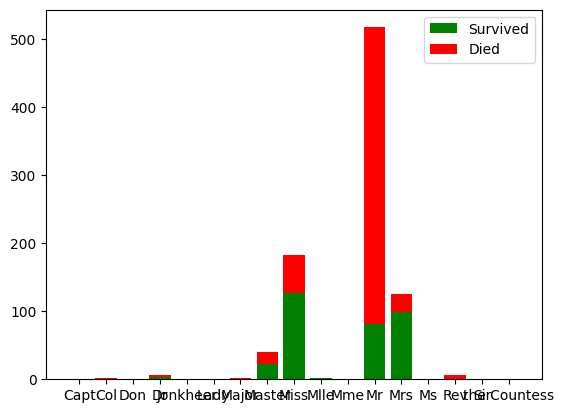

In [605]:
x = sorted(train_df['Title'].unique())

def safeGet(i, survived):
    try:
        return survival_by_title[x[i]][survived]
    except KeyError:
        return 0

y1 = [safeGet(i,1) for i in range(len(x))]
y2 = [safeGet(i,0) for i in range(len(x))]

for i in range(len(x)):
    print(f"Title: {x[i]}  Rate: {y1[i]/(y1[i] + y2[i])}")

plt.bar(x, y1, color='green', label='Survived')
plt.bar(x, y2, bottom=y1, color='red', label='Died')
plt.legend()
plt.show()

In [606]:
def isMarried(x):
    if (x == 'Mrs' or x == 'Mme'):
        return 1
    else:
        return 0

all_df['isMarried'] = all_df['Title'].apply(isMarried)

In [607]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Ticket Frequency,Deck,Initial,Family Name,Title,isMarried
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,0,NaN,S,3,3,3,B,Braund,Mr,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,11,C85,C,3,1,0,C,Cumings,Mrs,1
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,3,NaN,S,0,3,3,H,Heikkinen,Miss,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,10,C123,S,3,1,0,F,Futrelle,Mrs,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,3,NaN,S,0,3,3,A,Allen,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,3,NaN,S,0,3,3,S,Spector,Mr,0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,12,C105,C,0,1,0,O,Oliva y Ocana,Dona,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,0,NaN,S,0,3,3,S,Saether,Mr,0
1307,1308,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,3,NaN,S,0,3,3,W,Ware,Mr,0


### Grouping the titles by sex and status

In [608]:
def bin_title(x):
    female_general = ['Miss','Mrs','Ms','Mme','Mlle']
    if x == 'Mr':
        return 'Mr'
    elif x in female_general:
        return 'Ms'
    elif x == 'Master':
        return 'Master'
    else:
        return 'other'

all_df['Title'] = all_df['Title'].apply(bin_title)

In [609]:
all_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Ticket Frequency,Deck,Initial,Family Name,Title,isMarried
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,0,NaN,S,3,3,3,B,Braund,Mr,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,11,C85,C,3,1,0,C,Cumings,Ms,1
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,3,NaN,S,0,3,3,H,Heikkinen,Ms,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,10,C123,S,3,1,0,F,Futrelle,Ms,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,3,NaN,S,0,3,3,A,Allen,Mr,0
5,6,0.0,3,"Moran, Mr. James",1,NaN,0,0,330877,4,NaN,Q,0,3,3,M,Moran,Mr,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,10,E46,S,0,1,1,M,McCarthy,Mr,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,7,NaN,S,2,2,3,P,Palsson,Master,0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,5,NaN,S,3,1,3,J,Johnson,Ms,1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,9,NaN,C,3,1,3,N,Nasser,Ms,1


In [610]:
all_df.groupby(['Title']).size()

Title
Master     61
Mr        757
Ms        462
other      29
dtype: int64

Title: Master  Rate: 0.575
Title: Mr  Rate: 0.15667311411992263
Title: Ms  Rate: 0.7395498392282959
Title: other  Rate: 0.34782608695652173


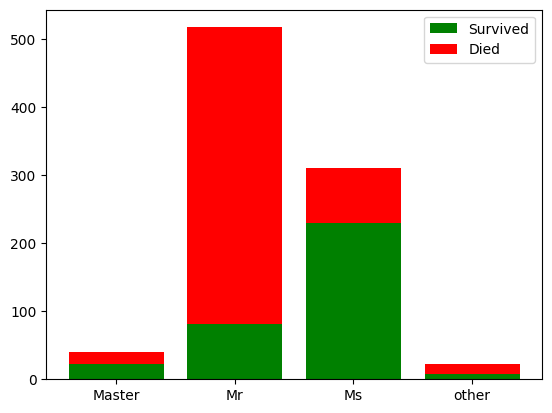

In [611]:
train_df, test_df = split_dfs(all_df)

survival_by_title = train_df.groupby(['Title','Survived']).size()

x = sorted(train_df['Title'].unique())

def safeGet(i, survived):
    try:
        return survival_by_title[x[i]][survived]
    except KeyError:
        return 0

y1 = [safeGet(i,1) for i in range(len(x))]
y2 = [safeGet(i,0) for i in range(len(x))]

for i in range(len(x)):
    print(f"Title: {x[i]}  Rate: {y1[i]/(y1[i] + y2[i])}")

plt.bar(x, y1, color='green', label='Survived')
plt.bar(x, y2, bottom=y1, color='red', label='Died')
plt.legend()
plt.show()

## Encode the other values

In [612]:
titleEncoder = LabelEncoder()
familyEncoder = LabelEncoder()
initialEncoder = LabelEncoder()
embarkEncoder = LabelEncoder()
fareEncoder = LabelEncoder()

titleEncoder.fit(all_df['Title'].unique())
familyEncoder.fit(all_df['Family Name'].unique())
initialEncoder.fit(all_df['Initial'].unique())
embarkEncoder.fit(all_df['Embarked'].unique())
fareEncoder.fit(all_df['Fare'].unique())

all_df['Title'] = titleEncoder.transform(all_df['Title'])
all_df['Family Name'] = familyEncoder.transform(all_df['Family Name'])
all_df['Initial'] = initialEncoder.transform(all_df['Initial'])
all_df['Embarked'] = embarkEncoder.transform(all_df['Embarked'])
all_df['Fare'] = fareEncoder.transform(all_df['Fare'])

all_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Ticket Frequency,Deck,Initial,Family Name,Title,isMarried
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,0,NaN,2,3,3,3,1,100,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,11,C85,0,3,1,0,2,182,2,1
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,3,NaN,2,0,3,3,7,329,2,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,10,C123,2,3,1,0,5,267,2,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,3,NaN,2,0,3,3,0,15,1,0
5,6,0.0,3,"Moran, Mr. James",1,NaN,0,0,330877,4,NaN,1,0,3,3,12,538,1,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,10,E46,2,0,1,1,12,500,1,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,7,NaN,2,2,2,3,15,608,0,0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,5,NaN,2,3,1,3,9,382,2,1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,9,NaN,0,3,1,3,13,559,2,1


## What is age the most likely correlated with?

In [613]:
possible_correlations = ['Pclass','Age','Sex','SibSp','Parch','FamilySize','Fare','Deck','Ticket Frequency', 'Title']
age_correlation_df = all_df[possible_correlations]
age_correlation_df = age_correlation_df.dropna(subset=['Age'])

In [614]:
age_correlation_df.head(20)

,Pclass,Age,Sex,SibSp,Parch,FamilySize,Fare,Deck,Ticket Frequency,Title
0,3,22.0,1,1,0,3,0,3,3,1
1,1,38.0,0,1,0,3,11,0,1,2
2,3,26.0,0,0,0,0,3,3,3,2
3,1,35.0,0,1,0,3,10,0,1,2
4,3,35.0,1,0,0,0,3,3,3,1
6,1,54.0,1,0,0,0,10,1,1,1
7,3,2.0,1,3,1,2,7,3,2,0
8,3,27.0,0,0,2,3,5,3,1,2
9,2,14.0,0,1,0,3,9,3,1,2
10,3,4.0,0,1,1,3,7,2,1,2


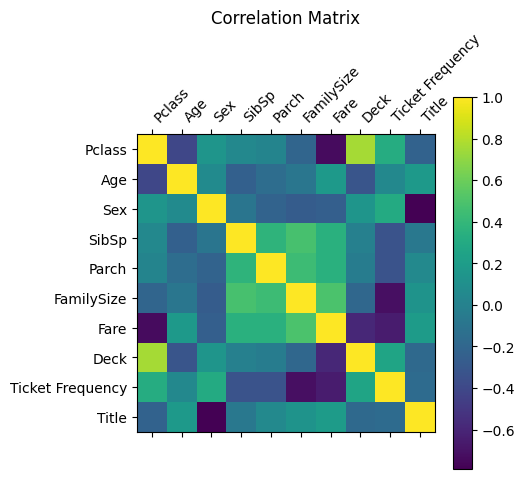

In [615]:
plt.matshow(age_correlation_df.corr())
plt.xticks(range(len(age_correlation_df.columns)), age_correlation_df.columns, rotation=45, ha='left')
plt.yticks(range(len(age_correlation_df.columns)), age_correlation_df.columns)
cb = plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

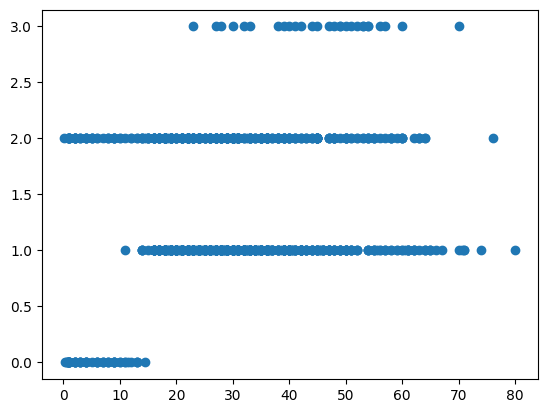

In [616]:
plt.scatter(age_correlation_df['Age'], age_correlation_df['Title'])

Not very good if I have to be honest

## It appears that some fares are null. Since it's most correlated with ticket frequency, let's use that!

In [617]:
unknown_fare = all_df.groupby('Ticket Frequency')['Fare'].mean()[1]
all_df.at[1043,'Fare'] = unknown_fare

In [618]:
all_df.iloc[1043]

PassengerId                       1044
Survived                           NaN
Pclass                               3
Name                Storey, Mr. Thomas
Sex                                  1
Age                               60.5
SibSp                                0
Parch                                0
Ticket                            3701
Fare                          8.530526
Cabin                              NaN
Embarked                             2
FamilySize                           0
Ticket Frequency                     3
Deck                                 3
Initial                             18
Family Name                        768
Title                                1
isMarried                            0
Name: 1043, dtype: object

## Resorting to regression implementation

In [619]:
from sklearn.linear_model import LinearRegression

known_ages = all_df[all_df['Age'].notnull()]
unknown_ages = all_df[all_df['Age'].isnull()]
missing_age_indexes = missing_age_index = all_df[all_df['Age'].isnull()].index

X = known_ages[['Pclass','Sex','SibSp','Parch','FamilySize','Fare','Deck','Ticket Frequency']]
unknown_ages = unknown_ages[['Pclass','Sex','SibSp','Parch','FamilySize','Fare','Deck','Ticket Frequency']]
y = known_ages['Age']

regressor = LinearRegression()
regressor.fit(X, y)

predicted_ages = regressor.predict(unknown_ages)

all_df.loc[missing_age_indexes, 'Age'] = predicted_ages

In [620]:
all_df.info(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       1309 non-null   int64  
 1   Survived          891 non-null    float64
 2   Pclass            1309 non-null   int64  
 3   Name              1309 non-null   object 
 4   Sex               1309 non-null   int64  
 5   Age               1309 non-null   float64
 6   SibSp             1309 non-null   int64  
 7   Parch             1309 non-null   int64  
 8   Ticket            1309 non-null   object 
 9   Fare              1309 non-null   float64
 10  Cabin             295 non-null    object 
 11  Embarked          1309 non-null   int64  
 12  FamilySize        1309 non-null   int64  
 13  Ticket Frequency  1309 non-null   int64  
 14  Deck              1309 non-null   int64  
 15  Initial           1309 non-null   int64  
 16  Family Name       1309 non-null   int64  


## Bin and encode the ages

In [621]:
all_df['Age'] = pandas.qcut(all_df['Age'], 10)

ageEncoder = LabelEncoder()
ageEncoder.fit(all_df['Age'].unique())
all_df['Age'] = ageEncoder.transform(all_df['Age'])

all_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Ticket Frequency,Deck,Initial,Family Name,Title,isMarried
0,1,0.0,3,"Braund, Mr. Owen Harris",1,2,1,0,A/5 21171,0.0,NaN,2,3,3,3,1,100,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,7,1,0,PC 17599,11.0,C85,0,3,1,0,2,182,2,1
2,3,1.0,3,"Heikkinen, Miss. Laina",0,4,0,0,STON/O2. 3101282,3.0,NaN,2,0,3,3,7,329,2,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,7,1,0,113803,10.0,C123,2,3,1,0,5,267,2,1
4,5,0.0,3,"Allen, Mr. William Henry",1,7,0,0,373450,3.0,NaN,2,0,3,3,0,15,1,0
5,6,0.0,3,"Moran, Mr. James",1,4,0,0,330877,4.0,NaN,1,0,3,3,12,538,1,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,9,0,0,17463,10.0,E46,2,0,1,1,12,500,1,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,0,3,1,349909,7.0,NaN,2,2,2,3,15,608,0,0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,4,0,2,347742,5.0,NaN,2,3,1,3,9,382,2,1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,0,1,0,237736,9.0,NaN,0,3,1,3,13,559,2,1


## Drop the useless columns

In [622]:
all_df = all_df.drop(columns=['PassengerId', 'Name','Ticket','Cabin'])

## Split the dataframes

In [623]:
train_df, test_df = split_dfs(all_df)

## Test run by dividing the training set and running cross_validation

In [624]:
x_train, y_train, x_test, y_test = split_single(train_df, split_percent= float(2/3))

In [630]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(max_depth=30,max_features='sqrt',min_samples_leaf=1,min_samples_split=5,n_estimators=1000)

def eval_model(model):
    randomforest = model
    randomforest.fit(x_train, y_train)
    y_pred = randomforest.predict(x_test)    
    accuracy_rf = round(accuracy_score(y_pred, y_test) * 100, 2)
    print(accuracy_rf)
    
def eval_model_k_times(model, k=100):
    all_scores = []
    min = 100
    max = 0
    sum = 0
    for i in range(k):
        randomforest = model
        randomforest.fit(x_train, y_train)
        y_pred = randomforest.predict(x_test)    
        accuracy_rf = round(accuracy_score(y_pred, y_test) * 100, 2)

        all_scores.append(accuracy_rf)
        min = accuracy_rf if accuracy_rf < min else min
        max = accuracy_rf if accuracy_rf > max else max
        sum += accuracy_rf

    mean = sum / k
    print(f"Mean: {mean}")
    print(f"Min: {min}")
    print(f"Max: {max}")
    plt.hist(all_scores)

eval_model(rf)

85.52


In [631]:
from sklearn.model_selection import KFold, cross_val_score

X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

# Initialize the K-Fold cross-validator
kf = KFold(n_splits=5, shuffle=True)

# Perform cross-validation
scores = cross_val_score(rf, X, y, cv=kf)

# Print the results
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())


Cross-validation scores: [0.84916201 0.85955056 0.80898876 0.82022472 0.80898876]
Mean accuracy: 0.8293829640323895
Standard deviation of accuracy: 0.021057136069311304


## Kaggle Submission

In [632]:
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

print(X)
print(y)

     Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  FamilySize  \
0         3    1    2      1      0   0.0         2           3   
1         1    0    7      1      0  11.0         0           3   
2         3    0    4      0      0   3.0         2           0   
3         1    0    7      1      0  10.0         2           3   
4         3    1    7      0      0   3.0         2           0   
..      ...  ...  ...    ...    ...   ...       ...         ...   
886       2    1    4      0      0   5.0         2           0   
887       1    0    1      0      0   9.0         2           0   
888       3    0    1      1      2   8.0         2           3   
889       1    1    4      0      0   9.0         0           0   
890       3    1    6      0      0   1.0         1           0   

     Ticket Frequency  Deck  Initial  Family Name  Title  isMarried  
0                   3     3        1          100      1          0  
1                   1     0        2          182      

## The randomforest hyperparameters were calculated via GridSearchCV. Raw code is below

Params found:

max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=5,n_estimators=100 (0.7703 on Kaggle)

In [633]:
randomforest = RandomForestClassifier(max_depth=30,max_features='sqrt',min_samples_leaf=1,min_samples_split=5,n_estimators=1000)
randomforest.fit(X,y)
y_predicted = randomforest.predict(test_df)

In [634]:
import csv

fieldnames = ["PassengerId", "Survived"]
predictions_dict = []
for i, index in enumerate(test_df.index.values):
    prediction = {
        "PassengerId": index + 1,
        "Survived": int(y_predicted[i])
    }
    predictions_dict.append(prediction)

with open('data/predictions.csv', mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(predictions_dict)